# Assignment 1

## Part One: Network Models

### Watts-Strogatz Networks

* **Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity _p_ = 0, 0.1, and 1\. Calculate the average shortest path length < _d_ \> for each one. Describe what happens to the network when _p_ = 1\.**

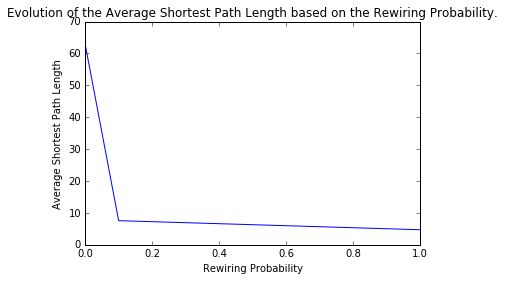

62.875751503 7.56744689379 4.72896192385


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Number of nodes
N = 500
# Average degree
k = 4

# Create 3 graphs with varying rewiring probabilities
WS1 = nx.watts_strogatz_graph(N, k, p=0)
WS2 = nx.watts_strogatz_graph(N, k, p=0.1)
WS3 = nx.watts_strogatz_graph(N, k, p=1)

# Compute average shortest path length for each of the graphs
d_WS1 = nx.average_shortest_path_length(WS1)
d_WS2 = nx.average_shortest_path_length(WS2)
d_WS3 = nx.average_shortest_path_length(WS3)

# Plot the distances compared to their respective rewiring probabilities 
plt.plot([0, 0.1, 1], [d_WS1, d_WS2, d_WS3])
plt.xlabel('Rewiring probability')
plt.ylabel('Average shortest path length')
plt.title('Evolution of the average shortest path length based on the rewiring probability.')
plt.show()

print d_WS1, d_WS2, d_WS3

When p=1, the network increases in connectedness. What is happening is the network is taking more 'shortcuts' and components that normally wouldn't be connected (or you wouldn't expect to be) are now connected. We see that we get a shortest path length for that network of size 4.7, meaning on average we need between 4 and 5 links to go to any edge in the network. This is confirmed by the observations on real networks.

* **Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with _N_ = 500, < _k_ \> = 4, for each of _p_ = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < _d_ \> as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html "Link: http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html") to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [4]:
import numpy as np

# Number of nodes
N = 500
# Average degree
k = 4
# Number of graphs
count = 50
# List of Rewiring Probabilities
p_list = [0,0.01,0.03,0.05,0.1,0.2]

# Init average shortest path length and standard deviation list
d_av_list = []
d_std_list = []

def average_distance_at_p(N, k, p, count):
    '''
    Returns the average of <d> and the standard deviation for count graphs at probabilty p
    
    @params: 
        N, the number of nodes
        k, average degree
        p, probability
        count, number of graphs
        
    @returns:
        tuple containing average shortest path and the standard deviation
                
    '''
    d_WS_list = []
    # calculate shortest path for each graph then append it to a list
    for ii in xrange(count):
        WS = nx.watts_strogatz_graph(N, k, p)
        d_WS_list.append(nx.average_shortest_path_length(WS))
        
    # Compute the average path length over the last iterations and the standard deviation associated
    return (np.average(d_WS_list), np.std(d_WS_list))

In [6]:
# Go through list of probabilities and create a list containing d_av and d_std using helper function average_distance_at_p
for p in p_list:
    d_av, d_std = average_distance_at_p(N, k, p, count)
    d_av_list.append(d_av)
    d_std_list.append(d_std)

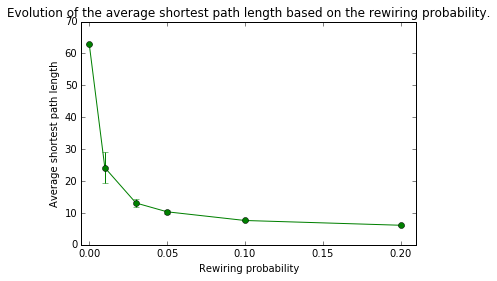

In [7]:
# Plot an error bar with the different values of p on the x-axis, and the average distance for a given p value on the y-axis
plt.errorbar(p_list, d_av_list, d_std_list, marker='o', color='green')
# Resize the axises for nicer visualisation
plt.axis((-0.005, 0.21, 0, 70))
plt.xlabel('Rewiring probability')
plt.ylabel('Average shortest path length')
plt.title('Evolution of the average shortest path length based on the rewiring probability.')
plt.show()

## The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* **Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

In [9]:
import random

def choose_random_node(G):
    '''
    Returns a random node from G, with a higher probability the more appearances a node has.
    '''
    # Flattened list of all the edges, contains repeated elements (nodes) based on the amount of edges the node has
    connections = [node for edge in G.edges() for node in edge]
    # Choose a random node
    return random.choice(connections)

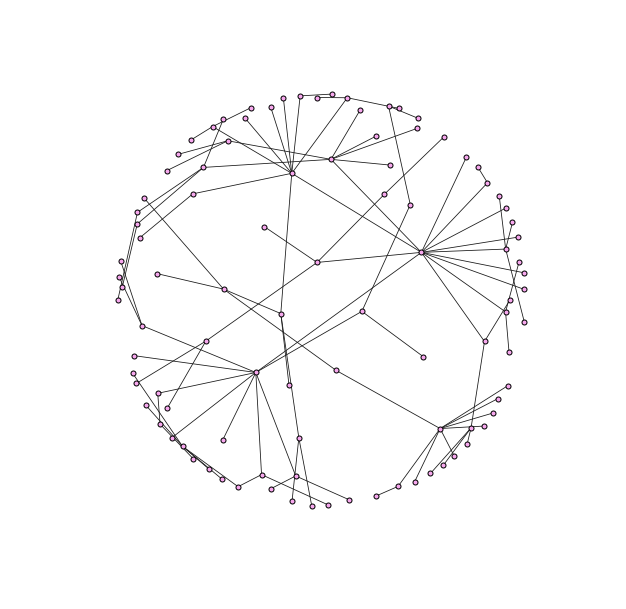

Network size : 100


In [10]:
# Create the Barabasi-Albert graph
BA = nx.Graph()

# create first node and link
BA.add_nodes_from([1,2])
BA.add_edge(1,2)

# Number of connections
N = 100

# Add the remaining nodes (start at the third node)
for node in range(len(BA.nodes())+1,N+1):
    BA.add_edge(node, choose_random_node(BA))

plt.figure(1,figsize=(8,8))
nx.draw(BA, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(BA))
plt.show()

print "Network size : %d" % len(BA.nodes())

* **Now create a 5000 node network.**

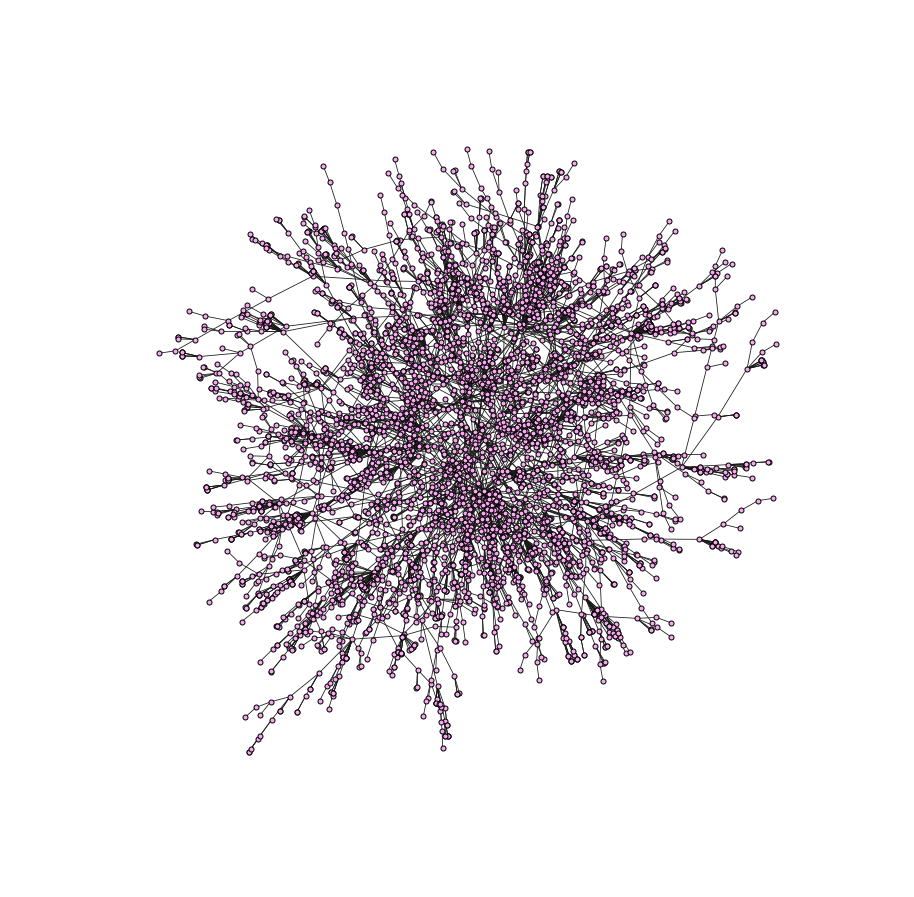

In [12]:
# Create the Barabasi-Albert graph
BA = nx.Graph()

# create first nodes and link them
BA.add_nodes_from([1,2])
BA.add_edge(1,2)

# Number of connections
N = 5000

# Add the remaining nodes (start at the third node
for node in range(len(BA.nodes())+1, N+1):
    BA.add_edge(node, choose_random_node(BA))

plt.figure(1,figsize=(12,12))
nx.draw(BA, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(BA))
plt.show()

print "Network size : %d" % len(BA.nodes())

* 
    * **What's the maximum and minimum degree?**

In [13]:
# Retrieve the degrees of the network
degrees = nx.degree(BA).values()

# Compute min and max values for the degrees
max_degree = max(degrees)
min_degree = min(degrees)

print "Maximum degree : %f" % max_degree
print "Minimum degree : %f" % min_degree

Maximum degree : 125.000000
Minimum degree : 1.000000


* 
    * **Now, bin the degree distribution, for example using `numpy.histogram`.**

In [14]:
# Compute the bins for our degree distribution
bins = [i for i in range(min_degree, max_degree+1)]

degrees_hist, degrees_bin = np.histogram(degrees, bins=bins)

* 
    * **Plot the distribution. Plot it with both linear and log-log axes.**

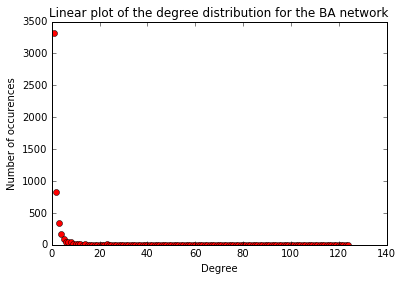

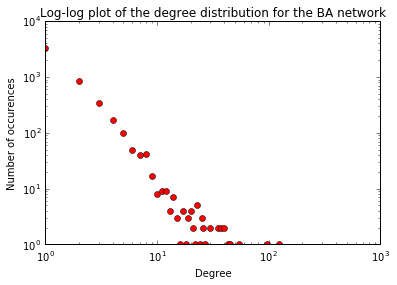

In [15]:
plt.plot(degrees_bin[:-1], degrees_hist, 'ro')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the degree distribution for the BA network')
plt.show()

plt.loglog(degrees_bin[:-1], degrees_hist, 'ro')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log-log plot of the degree distribution for the BA network')
plt.show()

## Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* **Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).**

In [18]:
# Choose a random node in the list of nodes
node_i = random.choice(BA.nodes())

# Retreive the degree of that node
degree_i = BA.degree(node_i)

print degree_i

1


* 
    * **Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.**

In [19]:
# Get the neighbors of node i
neighbors_i = BA.neighbors(i)

# Retrieve the degree of each neighbor of node i and compute the average 
degrees_neighbors_i = [BA.degree(neighbor_i) for neighbor_i in neighbors_i]
avg_degree_neighbors_i = np.average(degrees_neighbors_i)

print "i has %f friends whereas, on average, i's friends have %f friends" % (degree_i, avg_degree_neighbors_i)

15.5
i has 1.000000 friends whereas, on average, i's friends have 15.500000 friends


* 
    * **Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.**


In [20]:
def compute_random_node_degree_and_friends(G):
    # Choose a random node in the list of nodes
    node_i = random.choice(G.nodes())

    # Retreive the degree of that node
    degree_i = G.degree(node_i)
    
    # Get the neighbors of node i
    neighbors_i = G.neighbors(node_i)
    
    # Retrieve the degree of each neighbor of node i and compute the average 
    degrees_neighbors_i = [G.degree(neighbor_i) for neighbor_i in neighbors_i]
    avg_degree_neighbors_i = np.average(degrees_neighbors_i)
    
    return (degree_i, avg_degree_neighbors_i)

def is_friend_paradox_true(degree_i, avg_degree_neighbors_i):
    return degree_i < avg_degree_neighbors_i

In [21]:
print "Is it true that on average i's friend have more friends than i ? %s" % is_friend_paradox_true(degree_i, avg_degree_neighbors_i)

Is it true that on avrage i's friend have more friends than i ? True


* 
    * **Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [22]:
nb_paradox_true = 0

# Test the paradox 1000 times
for i in range(1000):
    (degree_i, avg_degree_neighbors_i) = compute_random_node_degree_and_friends(BA)
    # If the paradox is true, increment the count 
    if is_friend_paradox_true(degree_i, avg_degree_neighbors_i) == True:
        nb_paradox_true += 1

print "The paradox is true %d times out of 1000" % nb_paradox_true

The paradox is true 864 times out of 1000


## Growth without preferential attachment

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

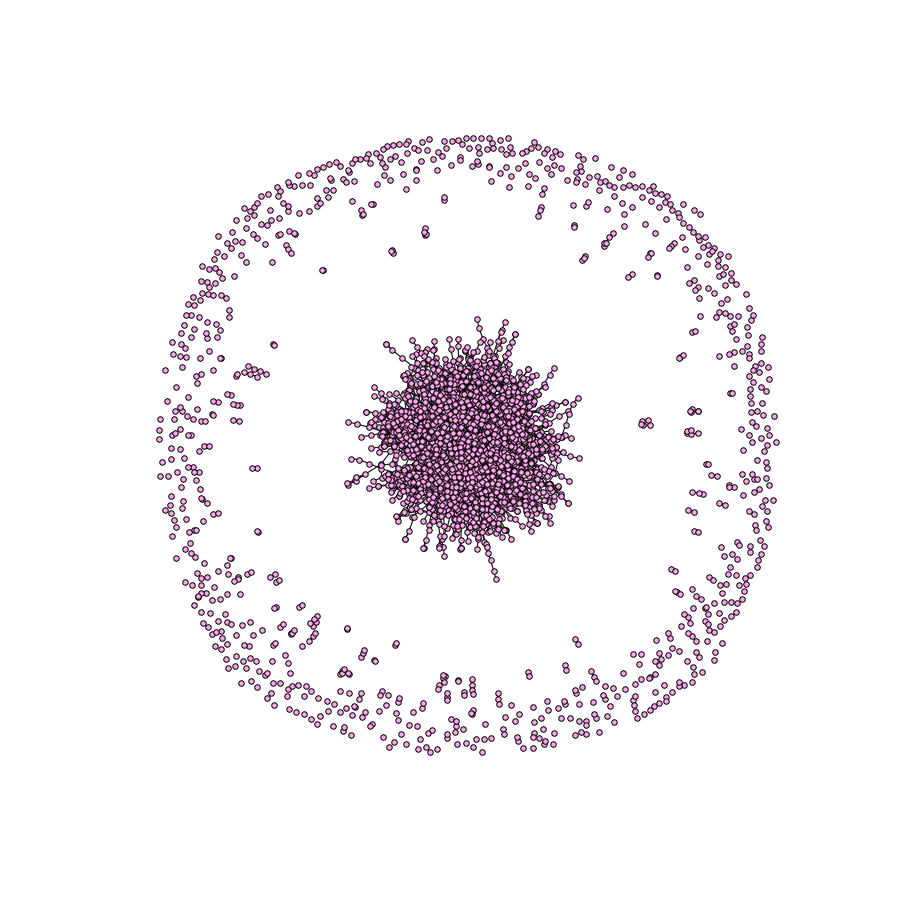

In [24]:
# Create the graph by using the built-in ER graph generator with the provided arguments
N = 5000
k = np.average(degrees)
p = k / (N - 1.)

ER = nx.erdos_renyi_graph(N, p)

plt.figure(figsize=(12,12))
nx.draw(ER, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

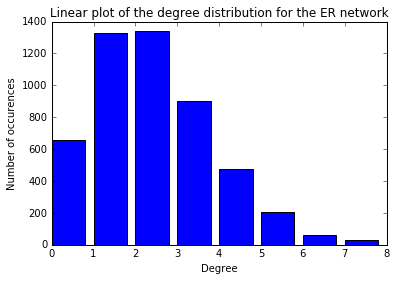

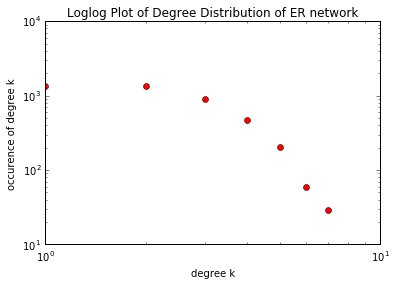

In [28]:
ER_degrees = nx.degree(ER).values()

bins = [i for i in range(min(ER_degrees), max(ER_degrees)+1)]

ER_degrees_hist, ER_degrees_bin = np.histogram(ER_degrees, bins=bins)

plt.bar(ER_degrees_bin[:-1], ER_degrees_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the degree distribution for the ER network')
plt.show()

plt.loglog(ER_degrees_bin[:-1], ER_degrees_hist, 'ro')
plt.xlabel("degree k")
plt.ylabel("occurence of degree k")
plt.title("Loglog Plot of Degree Distribution of ER network")
plt.show()

In [29]:
ER_nb_connected_comp = nx.number_connected_components(ER)
BA_nb_connected_comp = nx.number_connected_components(BA)

print "Number of connected component in ER : %d" % ER_nb_connected_comp
print "Number of connected component in BA : %d" % BA_nb_connected_comp

Number of connected component in ER : 772
Number of connected component in BA : 1


** Compare the network you've just built to the ER network of same size and same _p_. What are the differences? Explain in your own words. _Hint_: To get started, take a look at the degree distribution, and study the number of connected components. **

Two major differences between ER and BA network are:
* there is lots more variation of degrees in BA
* BA is a completely connected graph while ER contains isolated nodes

From the construction of the BA graph it is obvious that no isolated nodes will occur which explain the large difference between BA and ER. Looking at the degree distribution plots we can see that for BA networks the degree is ranging from 1-110 while in ER the degree ranges from 0-9. This effect is expected because BA implements preferential attachement.  

# Part Two: The Wikipedia Philosopher's network

This exercise assumes that you have downloaded and created the directed network of philosophers on Wikipedia, based on the six branches of philosophy on you own. 

In [24]:
### 
# The following code that retrieves the philosophers list is put in the same cell as it is needed to compute stats 
# but not evaluated per se 
###
import re, io
from itertools import chain

# More advanced regex that captures links with whitespaces and doesn't require any manual pre-processing of the file
re_wiki_link = r'\*.*?\[\[([^\[\]|]+)[^\[\]]*\]\]' 

### Aestheticians

# Open the aestheticians file
f = io.open('philosophers_aestheticians.txt', 'r', encoding='utf-8')

# Find all matches
aestheticians_matches = re.findall(re_wiki_link, f.read())

aestheticians_count = len(aestheticians_matches)
# Check that we have the 126 astheticians (manually counted)
print "All aestheticians ? %s (%d)" % (aestheticians_count == 126, aestheticians_count)

### Epistemologists

# Open the epistemologists file
f = io.open('philosophers_epistemologists.txt', 'r', encoding='utf-8')

# Find all matches
epistemologists_matches = re.findall(re_wiki_link, f.read())

epistemologists_count = len(epistemologists_matches)
# Check that we have the 99 epistemologists (manually counted)
print "All epistemologists ? %s (%d)" % (epistemologists_count == 99, epistemologists_count)

### Ethicists

# Open the ethicists file (we removed the last section 'See also' as it was hard to take into account in a single regex)
f = io.open('philosophers_ethicists.txt', 'r', encoding='utf-8')

# Find all matches
ethicists_matches = re.findall(re_wiki_link, f.read())

ethicists_count = len(ethicists_matches)
# Check that we have the 272 ethicists (manually counted)
print "All ethicists ? %s (%d)" % (ethicists_count == 272, ethicists_count)

### Logicians

# Open the logicians file
f = io.open('philosophers_logicians.txt', 'r', encoding='utf-8')

# Find all matches
logicians_matches = re.findall(re_wiki_link, f.read())

logicians_count = len(logicians_matches)
# Check that we have the 274 logicians (manually counted)
print "All logicians ? %s (%d)" % (logicians_count == 274, logicians_count)

### Metaphysicians

# Open the metaphysicians file
f = io.open('philosophers_metaphysicians.txt', 'r', encoding='utf-8')

# Find all matches
metaphysicians_matches = re.findall(re_wiki_link, f.read())

metaphysicians_count = len(metaphysicians_matches)
# Check that we have the 96 metaphysicians (manually counted)
print "All metaphysicians ? %s (%d)" % (metaphysicians_count == 96, metaphysicians_count)

### Social and political philosophers

# Open the sociopoliticians file (we removed the last section 'See also' as it was hard to take into account in a single regex)
f = io.open('philosophers_sociopolitical.txt', 'r', encoding='utf-8')

# Find all matches
sociopoliticians_matches = re.findall(re_wiki_link, f.read())

sociopoliticians_count = len(sociopoliticians_matches)
# Check that we have the 295 sociopoliticians (manually counted)
print "All sociopoliticians ? %s (%d)" % (sociopoliticians_count == 295, sociopoliticians_count)

### All philosophers 

# Combined list of all philosophers (with duplicates)
philosophers = list(chain(aestheticians_matches, epistemologists_matches, ethicists_matches, logicians_matches, 
                          metaphysicians_matches, sociopoliticians_matches))
# Set with all the philosophers (without duplicates)
philosophers_unique = set(philosophers)

philosophers_count = len(philosophers)
philosophers_count_unique = len(philosophers_unique)

print "Number of philosophers retrieved : %d" % philosophers_count_unique

All aestheticians ? True (126)
All epistemologists ? True (99)
All ethicists ? True (272)
All logicians ? True (274)
All metaphysicians ? True (96)
All sociopoliticians ? True (295)
Number of philosophers retrieved : 1013


## Basic stats

** First put together an overview of the 7 lists you created as part of lecture 4. **

In [28]:
# Overview of the 7 lists with the first 5 philosophers of each list

print "Aestheticians (count: %d)" % aestheticians_count
print aestheticians_matches[:5]

print "Epistemologists (count: %d)" % epistemologists_count
print epistemologists_matches[:5]

print "Ethicists (count: %d)" % ethicists_count
print ethicists_matches[:5]

print "Logicians (count: %d)" % logicians_count
print logicians_matches[:5]

print "Metaphysicians (count: %d)" % metaphysicians_count
print metaphysicians_matches[:5]

print "Sociopoliticians (count: %d)" % sociopoliticians_count
print sociopoliticians_matches[:5]

print "All philosophers (count: %d)" % philosophers_count_unique
print [philosopher for (i, philosopher) in enumerate(philosophers_unique) if i < 5]

Aestheticians (count: 126)
[u'Andreas Linder', u'Virgil Aldrich', u'Anandavardhana', u'Sri Aurobindo', u'John Anderson (philosopher)']
Epistemologists (count: 99)
[u'William Alston', u'Thomas Aquinas', u'Aristotle', u'Robert Audi', u'A. J. Ayer']
Ethicists (count: 272)
[u'Pierre Ab\xe9lard', u'B. R. Ambedkar', u'John Stevens Cabot Abbott', u'Mortimer Adler', u'Nayef Al-Rodhan']
Logicians (count: 274)
[u'Pierre Abelard', u'Wilhelm Ackermann', u'Sergei Adian', u'Rodolphus Agricola', u'Kazimierz Ajdukiewicz']
Metaphysicians (count: 96)
[u'Pythagoras', u'Democritus', u'Heraclitus', u'Anaximander', u'Plotinus']
Sociopoliticians (count: 295)
[u'Abraham Joshua Heschel', u'Abul Kalam Azad', u'Adam M\xfcller', u'Adrian Johnston (philosopher)', u'Alan Carter (philosopher)']
All philosophers (count: 1013)
[u'Christian Wolff (philosopher)', u'Eli Siegel', u'Marsilius of Inghen', u'Solomon Passy', u'Heinrich Gustav Hotho']


* Let's put together some descriptive statistics:
    * **How many philosophers in each list? How many total?**


In [26]:
print "There are %d aesthicians" % aestheticians_count
print "There are %d epistemologists" % epistemologists_count
print "There are %d ethicists" % ethicists_count
print "There are %d logicians" % logicians_count
print "There are %d metaphysicians" % metaphysicians_count
print "There are %d sociopoliticians \n" % sociopoliticians_count
print "There are %d philosophers in total" % philosophers_count_unique

There are 126 aesthicians
There are 99 epistemologists
There are 272 ethicists
There are 274 logicians
There are 96 metaphysicians
There are 295 sociopoliticians 

There are 1013 philosophers in total


* 
    * **Which is the largest branch of philosophy?**

In [29]:
# Based on the last result, we can see the largest branch is the social and political branch, but let's code it

philosophers_branch_count_dict = {
    'aesthicians': aestheticians_count,
    'epistemologists': epistemologists_count,
    'ethicists': ethicists_count,
    'logicians': logicians_count,
    'metaphysicians': metaphysicians_count, 
    'social and political': sociopoliticians_count
}

largest_branch_name = 'aesthicians'
largest_branch_count = aestheticians_count

for branch_name, branch_count in philosophers_branch_count_dict.iteritems():
    if branch_count >= largest_branch_count:
        largest_branch_name = branch_name
        largest_branch_count = branch_count
        
print "The largest branch of philosophy is the %s branch with %d philosophers." % (largest_branch_name, largest_branch_count)

The largest branch of philosophy is the social and political branch with 295 philosophers.


* 
    * **Which philosopher is in most lists & and how many?**

In [31]:
# Helper function to increment the count of the philosophers participation if the philosopher is in the given branch
def if_philosopher_in_branch(philosopher_branches, philosopher, branch):
    if philosopher in branch:
        philosopher_branches[philosopher] += 1

In [32]:
philosopher_branches = {}

# Loop through each philosopher, and check if he's the present in one of the branches
for philosopher in philosophers_unique:
    philosopher_branches[philosopher] = 0
    
    if_philosopher_in_branch(philosopher_branches, philosopher, aestheticians_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, epistemologists_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, ethicists_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, logicians_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, metaphysicians_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, sociopoliticians_matches)

# Find the philosopher with the most count 
philosopher_most_list = ""
philosopher_most_list_count = 0
for philosopher, count in philosopher_branches.iteritems():
    if count >= philosopher_most_list_count:
        philosopher_most_list = philosopher
        philosopher_most_list_count = count

print "The philosopher that is in most branches is %s (present in %d branches)" % (philosopher_most_list, philosopher_most_list_count)

The philosopher that is in most branches is Aristotle (present in 6 branches)


*Please note that there is a number of philosopher who are present in 6 branches. In our case, Aristotle just appeared to be the last philosopher we found in the list with the most participation in branches. *

* 
    * Let's investigate philosophers active in multiple sub-fields. 
        * ** Create a list of every philosopher that occurs in more than one list. **
        

In [33]:
# As requested, we create a list (which will contain tuples of the form (philosopher_name, branches_count))
philosophers_in_multiple_branches = []
# We can use the dictionary we created before
for philosopher, count in philosopher_branches.iteritems():
    # If the philosopher has a count higher than 1, that means he's in more than one single branch
    if count > 1:
        philosophers_in_multiple_branches.append((philosopher, count))
        
print philosophers_in_multiple_branches[:5]

[(u'Christian Wolff (philosopher)', 2), (u'Martin Heidegger', 2), (u'Baruch Spinoza', 2), (u'Plato', 5), (u'Socrates', 2)]


* 
    * 
        * ** Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).**

In [35]:
# Sort the list we created using a lambda function to sort it on the count part of our tuples (using a minus to sort it in descending order)
philosophers_in_multiple_branches.sort(key=lambda (philosopher, count): -count)

* 
    * 
        * **Print the top 5 guys and their list counts. Have you heard of any of them?**

In [36]:
print philosophers_in_multiple_branches[:5]

[(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5)]


Those ~~guys~~ philosophers are pretty famous : Aristotle, Kant, Plato are all names that are universal in the history of philosophy.   

## Degree distributions

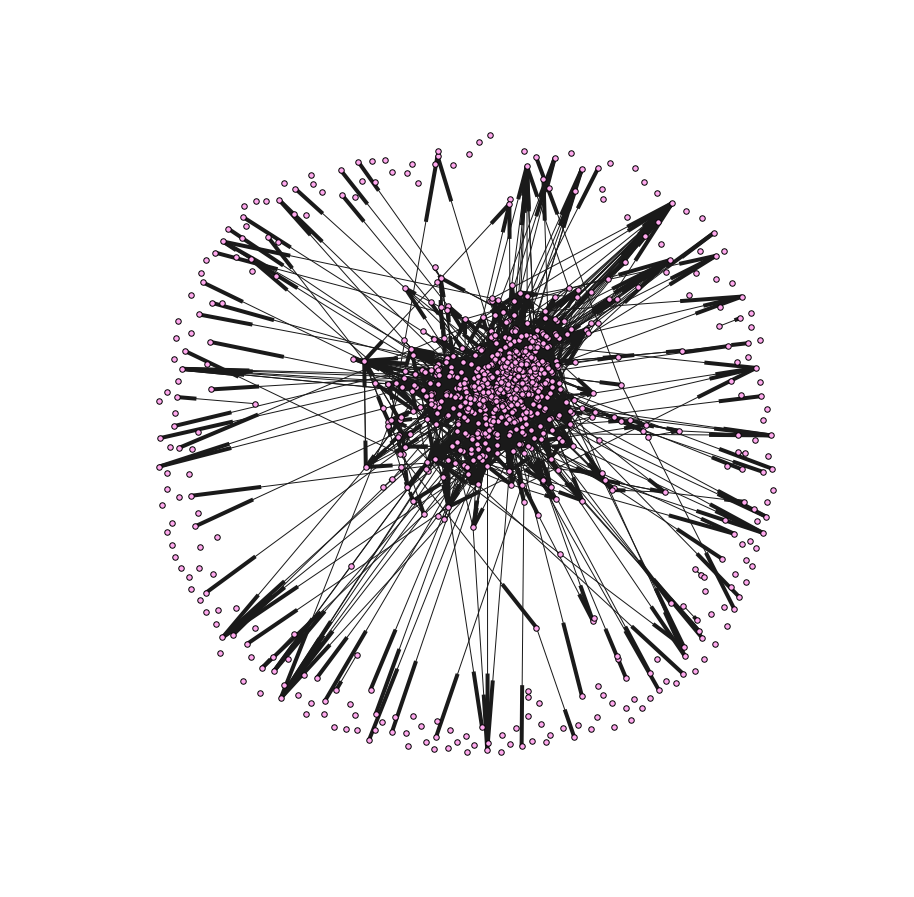

In [38]:
# Code needed to be able to answer the questions - all in one cell for brevity 
from os import listdir
from os.path import isfile, join
import networkx as nx
import matplotlib.pyplot as plt
import cPickle as pickle
%matplotlib inline 

# Redefine the regex - we don't need to take into account this time the leading * as we did earlier on 
re_wiki_link = r'\[\[([^\[\]|]+)[^\[\]]*\]\]'

philosophers_dir = '../files/philosophers'

def load_philosopher_from_file(file_name):
    with open(file_name, 'rb') as f:
        philosopher_json = pickle.load(f)
        return philosopher_json

def get_list_of_philosophers_files(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f))]
    return files


# Create a standard graph
phi_network = nx.DiGraph()

# Get all the files with the philosophers information
philosopher_files = get_list_of_philosophers_files(philosophers_dir)

for philosopher_file in philosopher_files:
    # Load the philosopher wiki page json content from each file  
    philosopher_wikipage = load_philosopher_from_file(philosopher_file)
    
    philosopher_pages = philosopher_wikipage['query']['pages']
    philosopher_content = philosopher_pages[philosopher_pages.keys()[0]]
    
    # Add node in the network
    philosopher_name = philosopher_content['title']
    phi_network.add_node(philosopher_name)
    
    # Retrieve the content in the page
    content_in_page = philosopher_content['revisions'][0]['*']
    
    # Find all links in the page
    links_in_page = re.findall(re_wiki_link, content_in_page)
    
    # Find all links in the page that refer to philosophers in our list using set's intersection
    connections = list(philosophers_unique.intersection(set(links_in_page)))
   
    # Add the edges to the network 
    connections_to_add = [(philosopher_name, connection) for connection in connections]
    phi_network.add_edges_from(connections_to_add)

# Plot the network     
pos = nx.spring_layout(phi_network)
plt.figure(1,figsize=(12,12))
nx.draw(phi_network, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1, pos=pos)
plt.show()

* **Why do you think we want to use a directed graph? Could have we used an undirected graph instead?**

It is more interesting to use a directed graph as we can see the connections between each philosopher in a more meaningful way : a reference to a philosopher on one of the philosopher's page isn't necessarily mutual and reciprocal. We can therefore see for a given philosopher how he's referenced by other philosopher's pages and how this philosopher is referring to other philosopher pages. 

If we used instead an undirected graph, we would have such a deep understanding on the connections between philosophers. 

* **What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?**

In [39]:
import numpy as np

print "Number of nodes in the philosopher network : %d" % len(phi_network.nodes())

print "Number of links in the philosopher network : %d" % len(phi_network.edges())

degrees = nx.degree(phi_network).values()

average_degree = np.average(degrees)

print "Average degree of the philosopher network : %f" % average_degree

median_degree = np.median(degrees)

print "Median degree of the philosopher network : %f" % median_degree

Number of nodes in the philosopher network : 1003
Number of links in the philosopher network : 4386
Average degree of the philosopher network : 8.745763
Median degree of the philosopher network : 4.000000


* **Provide similar statistics for the **

?

* **List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?**

In [41]:
phi_network_nodes = phi_network.nodes()

philosophers_in_degree_tuples = sorted([(node, phi_network.in_degree(node)) for node in phi_network_nodes], key=lambda (n, d): -d)
philosophers_out_degree_tuples = sorted([(node, phi_network.out_degree(node)) for node in phi_network_nodes], key=lambda (n, d): -d)

print "Top 10 philosophers by in-degree :"
print philosophers_in_degree_tuples[:10]
print "Top 10 philosophers by out-degree :"
print philosophers_out_degree_tuples[:10]

Top 10 philosophers by in-degree :
[(u'Immanuel Kant', 127), (u'Aristotle', 119), (u'Plato', 87), (u'Bertrand Russell', 85), (u'Karl Marx', 80), (u'Friedrich Nietzsche', 64), (u'David Hume', 63), (u'Ludwig Wittgenstein', 61), (u'John Stuart Mill', 57), (u'Georg Wilhelm Friedrich Hegel', 55)]
Top 10 philosophers by out-degree :
[(u'Georg Wilhelm Friedrich Hegel', 50), (u'Friedrich Nietzsche', 44), (u'Immanuel Kant', 42), (u'Martin Heidegger', 40), (u'Bertrand Russell', 40), (u'David Hume', 38), (u'S\xf8ren Kierkegaard', 33), (u'John Stuart Mill', 32), (u'Plato', 31), (u'Michel Foucault', 31)]


The interpretation of the degrees is as follow :
* in-degree is how many times a philosopher is referenced on other philosopher pages. This is a great indicator of a philosopher's influence on other philosophers ideas, style. 
* out-degree is how many times a philosopher references other philosophers. This can be interpreted as the other way round : how a philosopher is influenced by other philosophers.

Please note this is one possible interpretation, and if we study more carefully why some philosophers appear on some pages, they are not necessarily characterisation of an influence relation, the relations can quite diverse (like comparing two philosophers, etc). 

The degree associated to a philosopher is a reliable indicator of his popularity, and this is confirmed by the fact we find names such as Kant, Aritotle, Plato, Marx, Nietzche, Hegel, that are all really popular in the history of philosophy. 

* **Plot the distribution of in-degrees and out-degrees, binned using (for example) `numpy.histogram`. What is the most common degree?**

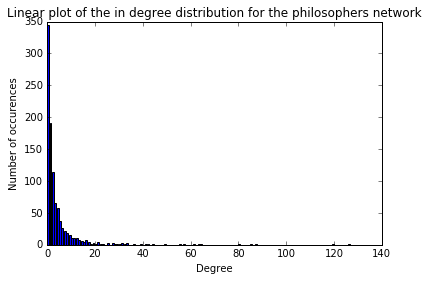

In [49]:
# Compute min and max values for the degrees
philosophers_in_degree = map(lambda x: x[1], philosophers_in_degree_tuples)
philosophers_out_degree = map(lambda x: x[1], philosophers_out_degree_tuples)
max_in_degree = max(philosophers_in_degree)
min_in_degree = min(philosophers_in_degree)
max_out_degree = max(philosophers_out_degree)
min_out_degree = min(philosophers_out_degree)

# Compute the bins for our degree distribution
bins_in = [i for i in range(min_in_degree, max_in_degree+1)]
bins_out = [i for i in range(min_out_degree, max_out_degree+1)]

degrees_in_hist, degrees_in_bin = np.histogram(philosophers_in_degree, bins=bins_in)
degrees_out_hist, degrees_out_bin = np.histogram(philosophers_out_degree, bins=bins_out)

plt.bar(degrees_in_bin[:-1], degrees_in_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the in degree distribution for the philosophers network')
plt.show()

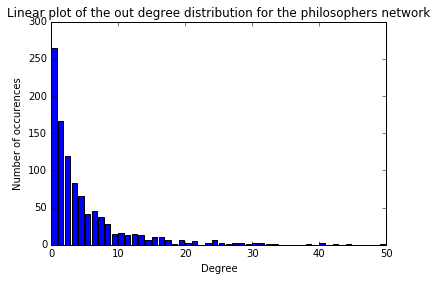

In [46]:
plt.bar(degrees_out_bin[:-1], degrees_out_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the out degree distribution for the philosophers network')
plt.show()

As we can see from the previous bar plots (used as they show better the degree distribution than a regular plot), the most common degree is pretty low, ranging between 0 and 2.  

* **Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.**

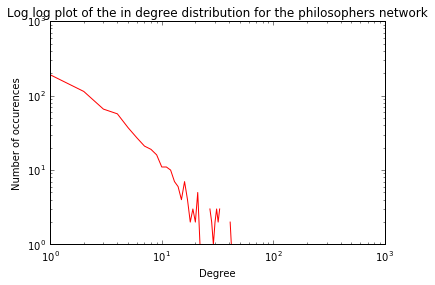

In [50]:
plt.loglog(degrees_in_bin[:-1], degrees_in_hist, 'r')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log log plot of the in degree distribution for the philosophers network')
plt.show()

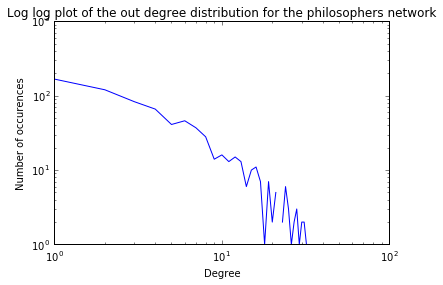

In [51]:
plt.loglog(degrees_out_bin[:-1], degrees_out_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log log plot of the out degree distribution for the philosophers network')
plt.show()

* **Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?**

The distributions seem to approach a power-law as we can see the long tail at the begining where the number of nodes with low degrees is really high and then it decreases as a function of roughly a power-law.  

* **Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out?**

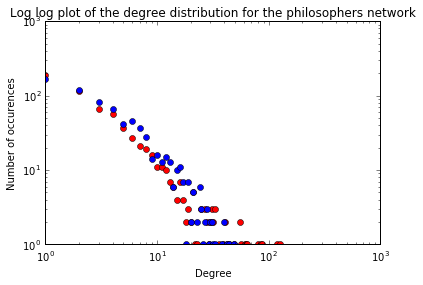

In [52]:
plt.loglog(degrees_in_bin[:-1], degrees_in_hist, 'ro')
plt.loglog(degrees_out_bin[:-1], degrees_out_hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log log plot of the degree distribution for the philosophers network')
plt.show()

We can see that the in-degrees and out-degrees follow the same curve. This means, on average, that we can expect to have as many connections coming in than connections coming out. However, we can see that the out degree (in blue) is above the in degree (in red) for values inferior to 100, and then the trends slowly changes and at the end the in degree is well above, especially for a few nodes. 

This means we have a few high influential individuals that have a lot of incoming references. This is confirmed by our previous where we saw that Kant was the most referenced (in-degree of 127) and comparatively, the philosopher with the most references to others philosophers was Hegel (out-degree of 50). There is a 2.5x difference between the highest in-degree and out-degree. 